<a href="https://colab.research.google.com/github/peeyushsinghal/EVA8/blob/main/Assignment_2.5/assignment_2_5_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Libraries

In [1]:
import torch
from torch.utils.data import Dataset # extending Dataset class for custom dataset
from torchvision import datasets # downloading MNIST
from torchvision.utils import make_grid # for vizualizing dataset loader
import torchvision.transforms  # to convert to tensor, normalization etc
import matplotlib.pyplot as plt # to plot pictures and check
import random # to generate random numbers
import torch.optim as optim # optimizer
import torch.nn as nn # to create network
import torch.nn.functional as F # to use in network to not include params
import numpy as np # for image plotting funtions

In [2]:
use_cuda = torch.cuda.is_available() # checking GPU
device = torch.device("cuda" if use_cuda else "cpu") # selecting GPU or CPU as per availability

###Dataset and Dataloader

- The dataset is based on MNIST: a new dataset class inherited from MNIST is created which not only includes the MNIST image but also a random number between 0 to 9. Further the dataset includes not only the MNIST label but also the sum of the label and the random number (integer).

- Dataloaders - both test and train is created based on the new dataset class created 

In [4]:
class MNISTCombined(datasets.MNIST):
  '''
  The dataset object MNISTCombined extends MNIST
  It would return MNIST Image, random number, MNIST Label and Sum of MNIST Label and Random Number as output
  '''
  # def __init__(self):
  #  no change from super, it is ok not to write this here also

  def __getitem__(self,index):
    image,label  = super(MNISTCombined,self).__getitem__(index) # this gets super class' get item 
    random_number = torch.tensor(random.randint(0,9)) # random number between 0 and 9
    return (image, random_number, label, label+ random_number) # outputs image, random number, label, sum of label and random number
  
  # def __len__(self):
  # no change from super, it is ok not to write this here also

In [5]:
# creating training and test loaders

batch_size_train = 32
batch_size_test = 1000 # this can be high as we just need the forward pass here

train_loader = torch.utils.data.DataLoader(
    MNISTCombined(
        root ='./', #arbit directory
        train=True, #train
        download=True,
        transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),#changing to tensor
                                       torchvision.transforms.Normalize(
                                           (0.1307,), (0.3081,))#normalizing
                                   ])),
                                   batch_size=batch_size_train, 
                                   shuffle=True# shuffling the dataset
                                   )

test_loader = torch.utils.data.DataLoader(
    MNISTCombined(
        root ='./', #arbit directory
        train=True, #train
        download=True,
        transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),#changing to tensor
                                       torchvision.transforms.Normalize(
                                           (0.1307,), (0.3081,))#normalizing
                                   ])),
                                   batch_size=batch_size_test, 
                                   shuffle=True# shuffling the dataset
                                   )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNISTCombined/raw/train-images-idx3-ubyte.gz to ./MNISTCombined/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNISTCombined/raw/train-labels-idx1-ubyte.gz to ./MNISTCombined/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNISTCombined/raw/t10k-images-idx3-ubyte.gz to ./MNISTCombined/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNISTCombined/raw/t10k-labels-idx1-ubyte.gz to ./MNISTCombined/raw



label:  tensor([9, 6, 8, 6, 8, 0, 3, 8, 7, 1, 5, 2, 7, 1, 2, 4, 6, 1, 1, 3, 7, 7, 5, 3,
        7, 0, 0, 2, 8, 4, 2, 8]), 
random number: tensor([3, 0, 2, 3, 5, 3, 2, 7, 8, 4, 2, 7, 5, 0, 0, 1, 5, 9, 2, 7, 6, 2, 5, 8,
        6, 3, 2, 1, 3, 9, 2, 7]), 
sum of label and random number: tensor([12,  6, 10,  9, 13,  3,  5, 15, 15,  5,  7,  9, 12,  1,  2,  5, 11, 10,
         3, 10, 13,  9, 10, 11, 13,  3,  2,  3, 11, 13,  4, 15])


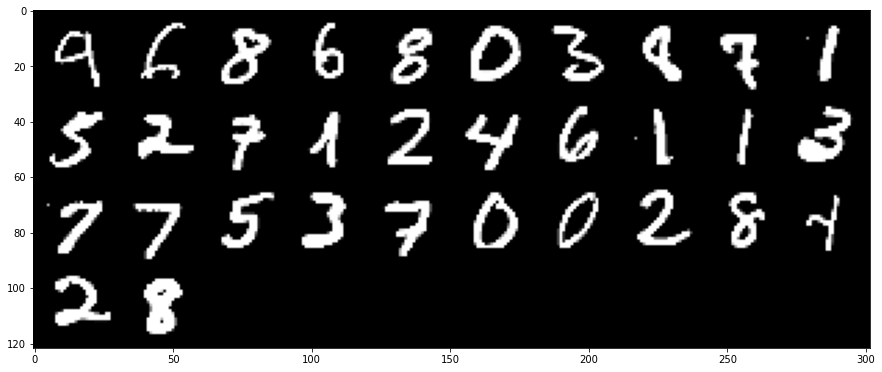

In [6]:
# visualizing the data set batch
img, number, label, sum_label_number = next(iter(train_loader))
grid = make_grid(img, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print (f'label:  {label}, \nrandom number: {number}, \nsum of label and random number: {sum_label_number}')

In [7]:
img, number, label, sum_label_number = next(iter(train_loader))
print(img.shape,number.shape,label.shape,sum_label_number.shape)


torch.Size([32, 1, 28, 28]) torch.Size([32]) torch.Size([32]) torch.Size([32])


In [10]:
number_one_hot = F.one_hot(number, num_classes=10) # checking how would one hot encoding would look like, actual encoding is done in NN forward function
print (f'number : {number} \n number_one_hot\n{number_one_hot}')

number : tensor([2, 4, 5, 9, 7, 0, 7, 7, 0, 5, 7, 7, 8, 2, 2, 7, 8, 8, 2, 5, 3, 3, 2, 6,
        5, 0, 1, 6, 0, 6, 7, 7]) 
 number_one_hot
tensor([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 

### Network

- It uses CNN to understand the image representation
- The image representation and one hot encoding of random number is concatenated
- Two separate heads are used - one for label prediction (classes 10) and one for sum prediction (classes 19), both taking the conctenated tensor

In [11]:
class Network(nn.Module):
  def __init__(self):
    super(Network,self).__init__()
    
    # self.conv1= nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5) # Input- 1x28x28 Output-6x24x24, 
    # self.conv2= nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5) # Input- 6x24x24 Output-12x20x20

    self.conv1= nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3) 
    self.conv2= nn.Conv2d(in_channels=3,out_channels=6,kernel_size=3) 
    self.conv3= nn.Conv2d(in_channels=6,out_channels=12,kernel_size=3) 
    self.conv4= nn.Conv2d(in_channels=12,out_channels=24,kernel_size=3)

    # A dense network head for label understanding
    self.label_fc1 = nn.Linear(in_features=((24*4*4)+10), out_features=120) # input features to include flattened image and random number on hot encoding
    self.label_fc2 = nn.Linear(in_features=120, out_features=60) 
    self.label_out = nn.Linear(in_features=60, out_features=10) # output would include one hot encoding for image label

    # A dense network head for sum of image label and random number understanding
    self.sum_fc1 = nn.Linear(in_features=((24*4*4)+10), out_features=120) # input features to include flattened image and random number on hot encoding
    self.sum_fc2 = nn.Linear(in_features=120, out_features=60) 
    self.sum_out = nn.Linear(in_features=60, out_features=19) # output would include one hot encoding for sum of image label and random number

  def forward(self,img,random_number):
    # The network takes in two inputs - image and random number
    x = img
    one_hot_random_number= F.one_hot(random_number.long(),num_classes=10) # TODO : .long is used as per stackoverflow, read about this

    # conv1 layer
    x = F.relu(self.conv1(x)) # Input- 1x28x28 Output-3x26x26

    # conv2 layer
    x = F.relu(self.conv2(x)) # Input- 3x26x26 Output-6x24x24
    x = F.max_pool2d(x,kernel_size=2, stride= 2) # Input- 6x24x24 Output-6x12x12

    # conv3 layer
    x = F.relu(self.conv3(x)) # Input- 6x12x12 Output-12x10x10

    # conv4 layer
    x = F.relu(self.conv4(x)) # Input- 12x10x10 Output-24x8x8
    x = F.max_pool2d(x,kernel_size=2, stride= 2) # Input- 24x8x8 Output-24x4x4

    # reshape
    x = x.reshape(-1, 24 * 4 * 4) # representation of image, flattened

    # concatenating image representation and one hot random number
    x_combined = torch.cat((x,one_hot_random_number),dim=1)

    # label fc1 layer
    img_label = F.relu(self.label_fc1(x_combined))
    # label fc2 layer
    img_label = F.relu(self.label_fc2(img_label))
    # label fc out layer
    img_label = self.label_out(img_label)

    # sum fc1 layer
    sum_label_number = F.relu(self.sum_fc1(x_combined))
    # sum fc2 layer
    sum_label_number = F.relu(self.sum_fc2(sum_label_number))
    # sum fc out layer
    sum_label_number = self.sum_out(sum_label_number)

    pred_label_one_hot = F.log_softmax(img_label, dim=1)
    pred_sum_label_number_one_hot = F.log_softmax(sum_label_number, dim=1)

    return pred_label_one_hot,pred_sum_label_number_one_hot

model = Network()
print(model)

Network(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (label_fc1): Linear(in_features=394, out_features=120, bias=True)
  (label_fc2): Linear(in_features=120, out_features=60, bias=True)
  (label_out): Linear(in_features=60, out_features=10, bias=True)
  (sum_fc1): Linear(in_features=394, out_features=120, bias=True)
  (sum_fc2): Linear(in_features=120, out_features=60, bias=True)
  (sum_out): Linear(in_features=60, out_features=19, bias=True)
)


## Training and Testing

In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = F.nll_loss #F.cross_entropy # global

In [15]:
def train(model, device, train_loader, optimizer, epoch):
  '''
  Train function takes in model, train_loader (data), optimizer and epoch and then trains the model
  This is a single epoch train function, it is expected that it would be inside a loop
    model - network
    device - GPU or CPU
    train_loader - custom train loader
    optimizer - optimizer object
    epoch - epoch number, in a loop typically executed
  '''
  model.train() # training mode on, enables gradient


  for batch_idx,(images, numbers, labels, sums_label_number) in enumerate(train_loader):
    optimizer.zero_grad() # setting gradients to zero, to remove accumulated gradients
    images, numbers, labels, sums_label_number = images.to(device), numbers.to(device), labels.to(device), sums_label_number.to(device) # sending tensors to GPU

    pred_labels, pred_sums_label_numbers= model(images,numbers) # Pass Batch, model takes two inputs and provides two outputs

    loss_label = loss_func(pred_labels,labels) # image label related loss calculation
    loss_sum = loss_func(pred_sums_label_numbers,sums_label_number) # sum of image label and random number loss calculation
    loss = 0.5*(loss_label + loss_sum) # overall loss 

    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    # print for some batches
    if (batch_idx % 500 == 0):
      print (f'Inside Training epoch - {epoch}, processing step {(batch_idx+1)*len(images[0])} , Training loss: {loss.item()} \n')

  # print for each epoch
  print(
    "After completion of epoch", epoch, 
    "  Training loss:", loss.item()
    )

In [14]:
def test(model, device, test_loader):
  '''
  Test function takes in model, test_loader (data), and evaluates the model
    model - network
    device - GPU or CPU
    test_loader - custom test data loader
  '''

  model.eval() # evaluation mode on, no updates to params
  total_loss = 0
  total_correct_label = 0
  total_correct_sum = 0
  with torch.no_grad():
    for (images, numbers, labels, sums_label_number) in (test_loader):
      images, numbers, labels, sums_label_number = images.to(device), numbers.to(device), labels.to(device), sums_label_number.to(device) # sending tensors to GPU
      pred_labels, pred_sums_label_numbers= model(images,numbers) # Pass Batch, model takes two inputs and provides two outputs in one hot encoding

      # predictions are in one hot encoding and ground truth are not
      loss_label = loss_func(pred_labels,labels) # image label related loss calculation
      loss_sum = loss_func(pred_sums_label_numbers,sums_label_number) # sum of image label and random number loss calculation
      loss= 0.5*(loss_label + loss_sum) # overall loss 

      total_loss += loss.item() # aggregating loss

      # converting predictions to numbers from one hot encoding and checking the correct label

      total_correct_label +=  pred_labels.argmax(dim=1).eq(labels).sum().item() # checking correct label 
      total_correct_sum += pred_sums_label_numbers.argmax(dim=1).eq(sums_label_number).sum().item() # checking correct sum 

  # print for each epoch
  print(
    "Testing...\n"
    "Test loss:", total_loss,
    "total_correct_label:", total_correct_label, 
    "accuracy_labels:", round(100.*total_correct_label/len(train_loader.dataset),3), "% ",
    "total_correct_sum:",total_correct_sum,
    "accuracy_correct_sum:",  round(100.*total_correct_sum/len(train_loader.dataset),3),"% "
    )

In [16]:
n_epochs = 5
model = model.to(device)

for epoch in range(1, n_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model,device,test_loader)

Inside Training epoch - 1, processing step 1 , Training loss: 2.6222634315490723
Inside Training epoch - 1, processing step 501 , Training loss: 1.1648956537246704
Inside Training epoch - 1, processing step 1001 , Training loss: 0.7958481907844543
Inside Training epoch - 1, processing step 1501 , Training loss: 0.7049594521522522
After completion of epoch 1   Training loss: 0.7129550576210022
Testing...
Test loss: 36.376513838768005 total_correct_label: 58928 accuracy_labels: 98.213 %  total_correct_sum: 34738 accuracy_correct_sum: 57.897 % 
Inside Training epoch - 2, processing step 1 , Training loss: 0.6237501502037048
Inside Training epoch - 2, processing step 501 , Training loss: 0.3853496313095093
Inside Training epoch - 2, processing step 1001 , Training loss: 0.15507294237613678
Inside Training epoch - 2, processing step 1501 , Training loss: 0.20194187760353088
After completion of epoch 2   Training loss: 0.10701191425323486
Testing...
Test loss: 7.575702026486397 total_correct

### Sample Prediction

In [17]:
def sample_results(model, device, test_loader, num_samples = 1):
  for i in range(num_samples):
    images, numbers, labels, sums_label_number = next(iter(test_loader))
    images, numbers, labels, sums_label_number = images.to(device), numbers.to(device), labels.to(device), sums_label_number.to(device) # sending tensors to GPU
    output, output_sum = model(images[i].unsqueeze(dim=0), numbers[i].unsqueeze(dim=0))
    print(f"Image Predicted:{torch.argmax(output.squeeze()).item()}, Image Actual:{labels[i].item()},Random Input Number:{numbers[i].item()},Sum Precicted:{torch.argmax(output_sum.squeeze()).item()}, Sum Actual:{sums_label_number[i]}")

In [18]:
sample_results(model, device, test_loader, num_samples = 1)

Image Predicted:3, Image Actual:3,Random Input Number:7,Sum Precicted:10, Sum Actual:10
